In [2]:
import networkx as nx
import seaborn as sns
import numpy as np
import pandas as pd
from operator import itemgetter

In [3]:
import powerlaw as pwl
from collections import Counter
import glob

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['degrees']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# PowerLaw and Scale-Free Test

### Dataset

The first part of our data analysis focuses on the study of the type of network we have created.

We expect that our network is a scale-free network and the definition is the following:

$$\textit{"A scale-free network is
a network whose}$$ 
$$\textit{degree 
distribution follows a power law."}$$

According to this definition it's important to study the power-law distribution.

Let's start by taking the dataset from our simulations. We have 10 different dataset from 10 different simulation of our network. We set 100000 agents.

For an easier manipulation in python we used .txt file.

In [11]:
filepath = r"C:\Users\Proprietario\Desktop\SLAPP\SLAPP3-master\6 objectSwarmObserverAgents_AESOP_turtleLib_NetworkX\Analisi 1" # use your path
all_files = glob.glob(filepath + "/*.txt")
G = {}
j = 0

for filename in all_files:
    G[j]=nx.DiGraph()
    fh=open(filename,'r')
    for i, line in enumerate(fh):
        s=line.strip()
        s=s.strip(";").split()
        if (i>6) and (s[0] != 'label') and (s[0] != '}') and (s[1] != '[style=filled,'):
            origin=int(s[0])
            dest=int(s[2])
            G[j].add_edge(origin,dest)
    fh.close()
    j += 1

The following part checks nodes and links of our network at every simulation.

In [12]:
for i in range (len(G)):
    print('The network has', len(G[i]), 'nodes and', len(G[i].edges()), 'links.')

The network has 100000 nodes and 193970 links.
The network has 100000 nodes and 194640 links.


### Degree Distribution

Let's plot the degree distribution of the network and check if it's the same at every simulation.

In [18]:
degrees = {}

for i in range (len(G)):
    for n in range(G[i].nodes()):
        degrees[i] = dict(G[i].in_degree(n))

TypeError: 'NodeView' object cannot be interpreted as an integer

In [17]:
degrees[0]

1

In [8]:
deg = {}
deg_distri = {}

for i in range (len(G)):
    deg[i]=dict(G[i].degree()).values()
    deg_distri[i]=Counter(deg[i])

In [9]:
deg[0]

dict_values([3, 36, 2, 2, 1, 1, 4, 3, 6, 4, 2, 2, 3, 6, 1, 4, 1, 1, 1, 5, 2, 1, 3, 2, 8, 751, 1, 4, 1, 1, 1, 3, 3, 3, 6, 2, 1, 7, 4, 3, 5, 1, 2, 1, 1, 1, 18, 1, 3, 2, 2, 2, 2, 2, 1, 10, 5, 1, 3, 1, 3, 3, 14, 2, 6, 1, 1, 3, 1, 3, 2, 2, 1, 2, 4, 3, 2, 5, 1, 2, 4, 2, 1, 1, 1, 2, 5, 1, 2, 2, 2, 1, 1, 2, 1, 5, 2, 3, 3, 1, 9, 2, 2, 7, 2, 5, 1, 2, 1, 2, 5, 2, 1, 7, 222, 1, 2, 1, 2, 2, 6, 62, 1, 3, 1, 16, 2, 3, 5, 2, 15, 1, 1, 1, 3, 1, 1, 6, 2, 11, 1, 1, 4, 1, 3, 1, 2, 2, 2, 2, 1, 4, 3, 3, 4, 1, 2, 2, 7, 1, 7, 1, 1, 1, 2, 1, 4, 2, 2, 21, 1, 2, 2, 2, 3, 2, 6, 1, 1, 1, 1, 46, 1, 6, 2, 3, 3, 1, 2, 1, 2, 2, 8, 1, 1, 2, 1, 2, 3, 14, 1, 1, 1, 5, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 3, 88, 1, 3, 1, 9, 1, 2, 49, 1, 2, 2, 3, 2, 2, 6, 5, 1, 9, 95, 5, 8, 5, 1, 5, 2, 11, 9, 20, 1, 1, 1, 2, 2, 14, 1, 4, 1, 1, 6, 3, 3, 2, 3, 4, 2, 2, 113, 4, 1, 2, 2, 4, 2, 2, 1, 3, 3, 1, 2, 1, 18, 11, 2, 2, 8, 1, 2, 3, 1, 1, 2, 12, 11, 2, 18, 2, 2, 17, 2, 5, 27, 1, 2, 2, 10, 3, 5, 2, 1, 1, 4, 1, 1, 1, 2, 1, 2, 1, 2, 2, 3, 3, 2, 1,

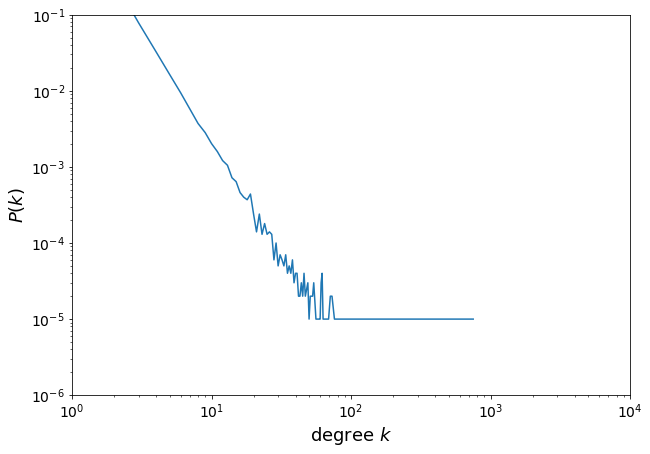

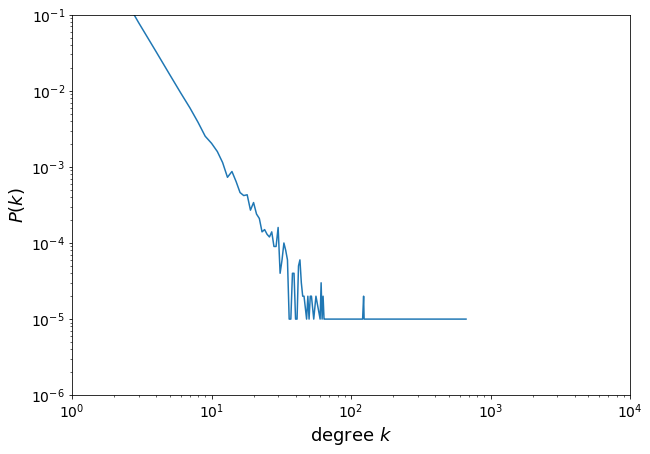

In [7]:
x = {}
y = {}
j = 0

for filename in all_files:
    x['File' + str(j)] = []
    y['File' + str(j)] = []

    for i in sorted(deg_distri[j]):   
        x['File' + str(j)].append(i)
        y['File' + str(j)].append(deg_distri[j][i]/len(G[j]))

    plt.figure(figsize=(10,7))    
    plt.plot(x['File' + str(j)],y['File' + str(j)])

    plt.xlabel('degree $k$', fontsize=18)
    plt.ylabel('$P(k)$', fontsize=18)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.yscale('log')
    plt.xscale('log')
    plt.axis([1,10000,0.000001,0.1])
    plt.show()
    j += 1

Using the 'hist()' function of matplotlib we can plot the probability density distribution, choosing the number of bins.

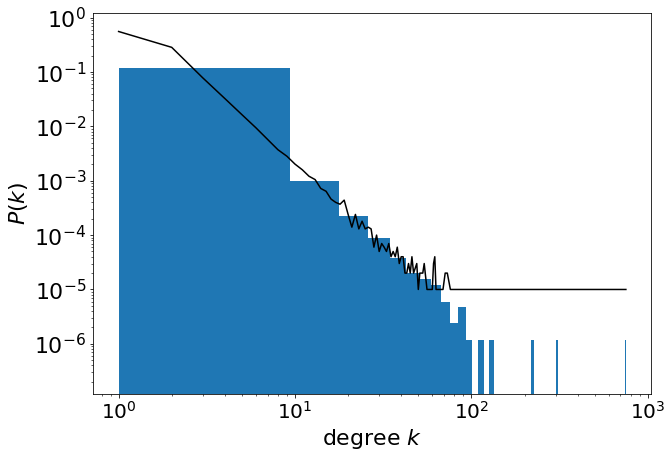

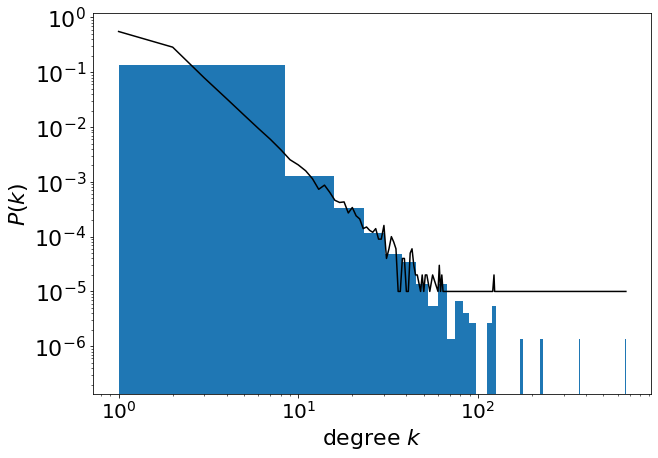

In [8]:
j = 0

for filename in all_files:
    plt.figure(figsize=(10,7))
    plt.hist(deg[j], bins=90, density=True, log=True, histtype='stepfilled')
    plt.plot(x['File' + str(j)],y['File' + str(j)],'black','o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=22)
    plt.xlabel('degree $k$', fontsize=22)
    plt.ylabel('$P(k)$', fontsize=22)
    j += 1

The *powerlaw* package provides direct access to the probability density function.

In [9]:
degree = {}
pwl_distri = {}
j = 0

for filename in all_files:
    degree[j]=list(deg[j])
    pwl_distri[j]=pwl.pdf(degree[j], bins=90)
    j += 1

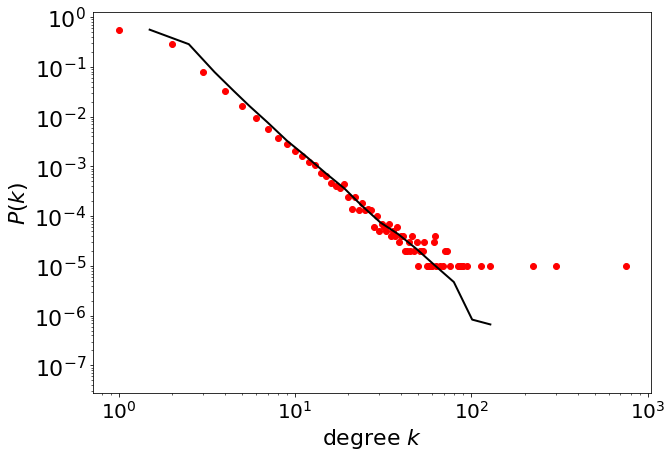

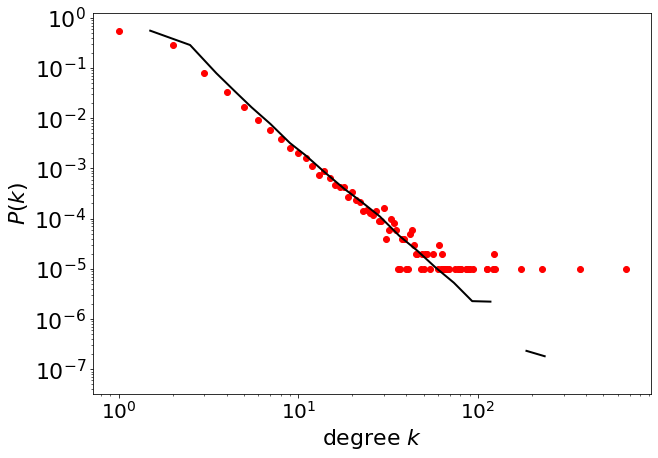

In [10]:
j = 0

for filename in all_files:
    plt.figure(figsize=(10,7))
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(x['File' + str(j)],y['File' + str(j)],'ro')

    pwl.plot_pdf(degree[j], color='black', linewidth=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=22)

    plt.xlabel('degree $k$', fontsize=22)
    plt.ylabel('$P(k)$', fontsize=22)
    j += 1

### Linear Binning

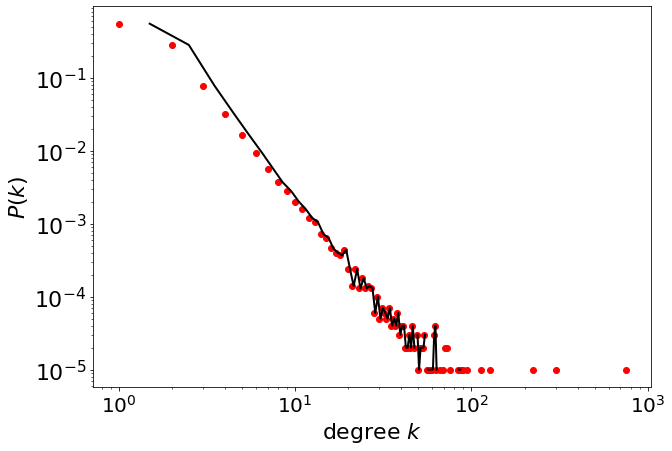

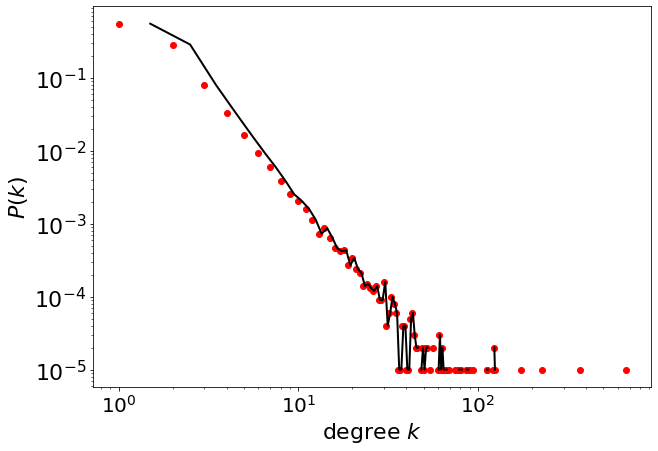

In [11]:
j = 0

for filename in all_files:
    plt.figure(figsize=(10,7))
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(x['File' + str(j)],y['File' + str(j)],'ro')

    pwl.plot_pdf(degree[j], linear_bins=True, color='black', linewidth=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=22)

    plt.xlabel('degree $k$', fontsize=22)
    plt.ylabel('$P(k)$', fontsize=22)
    j += 1

## Parameter estimation

The library powerlaw allows to estimate the exponent $\alpha$ and the minimum value for the scaling $x_{min}$

In [12]:
fit_function = {}
j = 0

for filename in all_files:
    fit_function[j] = pwl.Fit(degree[j])
    
    print(fit_function[j].power_law.alpha)
    print(fit_function[j].power_law.sigma)
    print(fit_function[j].power_law.xmin)
    print(fit_function[j].power_law.D)
    j += 1

3.1831160743099374
0.09772969750987469
15.0
0.028385393186874996
3.210572778313835
0.13025925015434164
20.0
0.02309898776458852


Calculating best minimal value for power law fit
D:\Anaconda\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


We can look at the values of the [Kolgomorov-Sminorv distance](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) of the two fits to compare them. Smaller distances correspond to better fits.

In [13]:
j = 0
fit_function_fixmin = {}

for filename in all_files:
    fit_function_fixmin[j] = pwl.Fit(degree[j], xmin=10)
    print(fit_function_fixmin[j].power_law.alpha)
    print(fit_function_fixmin[j].power_law.sigma)
    print(fit_function[j].power_law.D)
    print(fit_function_fixmin[j].power_law.D)
    j += 1

3.227398850171803
0.06545513326916252
0.028385393186874996
0.03135523710008403
3.1775646686956436
0.06429679903758145
0.02309898776458852
0.03987385942619387


### PowerLaw with Errorbars

In [14]:
x_mean = []
y_mean = []

for i in range (len(x['File0'])):
    j = 0
    temp = 0
    temp2 = 0
    
    for j in range(len(all_files)):
        temp += int(x['File' + str(j)][i])
        temp2 += y['File' + str(j)][i]
            
    x_mean.append(temp/len(all_files))
    y_mean.append(temp2/len(all_files))

In [15]:
y_std = []

for i in range(len(y['File0'])):
    temp = 0
    for j in range (len(all_files)):
        temp += (y['File'+str(j)][i] - y_mean[i])**2
    y_std.append(np.sqrt(temp/(len(all_files)-1)))

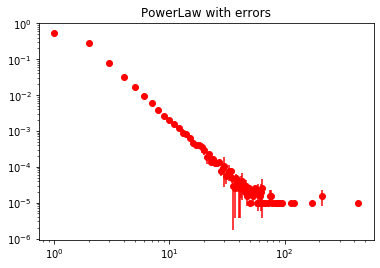

In [20]:
plt.yscale('log')
plt.xscale('log')
plt.errorbar(x_mean, y_mean, xerr=0, yerr=y_std,fmt='ro')
plt.title("PowerLaw with errors")
plt.show()

In [22]:
deg_mean = []

for i in range (len(G[0])):
    temp = 0
    for j in range(len(all_files)):
        temp += int(deg[j][i])
    deg_mean.append(temp/len(all_files))

TypeError: 'dict_values' object is not subscriptable